In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from create_plots import import_dataframe, show_stats, show_plots

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Select the dataset name to evaluate:

In [2]:
#prefix="small_network"
#prefix="small_network_uniform"
#prefix="small_network_uniform_larger_msa"
#prefix="medium_network_norandom"
#prefix="medium_network_norandom_uniform"
#prefix="medium_network_norandom_uniform_larger_msa"
#prefix="small_network_uniform_big_msa"

prefix="small_network_new"
#prefix="medium_network_norandom_new"

In [3]:
print("This evaluation is for: " + prefix)

This evaluation is for: small_network_new


In [4]:
df = import_dataframe(prefix)
print(df.columns)

Index(['name', 'n_taxa', 'n_trees', 'n_reticulations', 'msa_size',
       'sites_per_tree', 'sampling_type', 'simulation_type', 'celine_params',
       'brlen_scaler', 'seqgen_params', 'near_zero_branches_raxml',
       'n_equal_tree_pairs', 'true_network_weirdness', 'true_network_path',
       'inferred_network_path', 'likelihood_type', 'brlen_linkage_type',
       'start_type', 'timeout', 'n_random_start_networks',
       'n_parsimony_start_networks', 'runtime_inference',
       'n_reticulations_inferred', 'bic_true', 'logl_true', 'bic_inferred',
       'logl_inferred', 'bic_raxml', 'logl_raxml', 'rf_absolute_raxml',
       'rf_relative_raxml', 'rf_absolute_inferred', 'rf_relative_inferred',
       'hardwired_cluster_distance', 'softwired_cluster_distance',
       'displayed_trees_distance', 'tripartition_distance',
       'nested_labels_distance', 'path_multiplicity_distance', 'msa_patterns',
       'bic_diff', 'logl_diff', 'msa_patterns_relative'],
      dtype='object')


# Original Simulated Dataset Statistics 

Total number of datasets: 1016


<Figure size 1200x800 with 0 Axes>

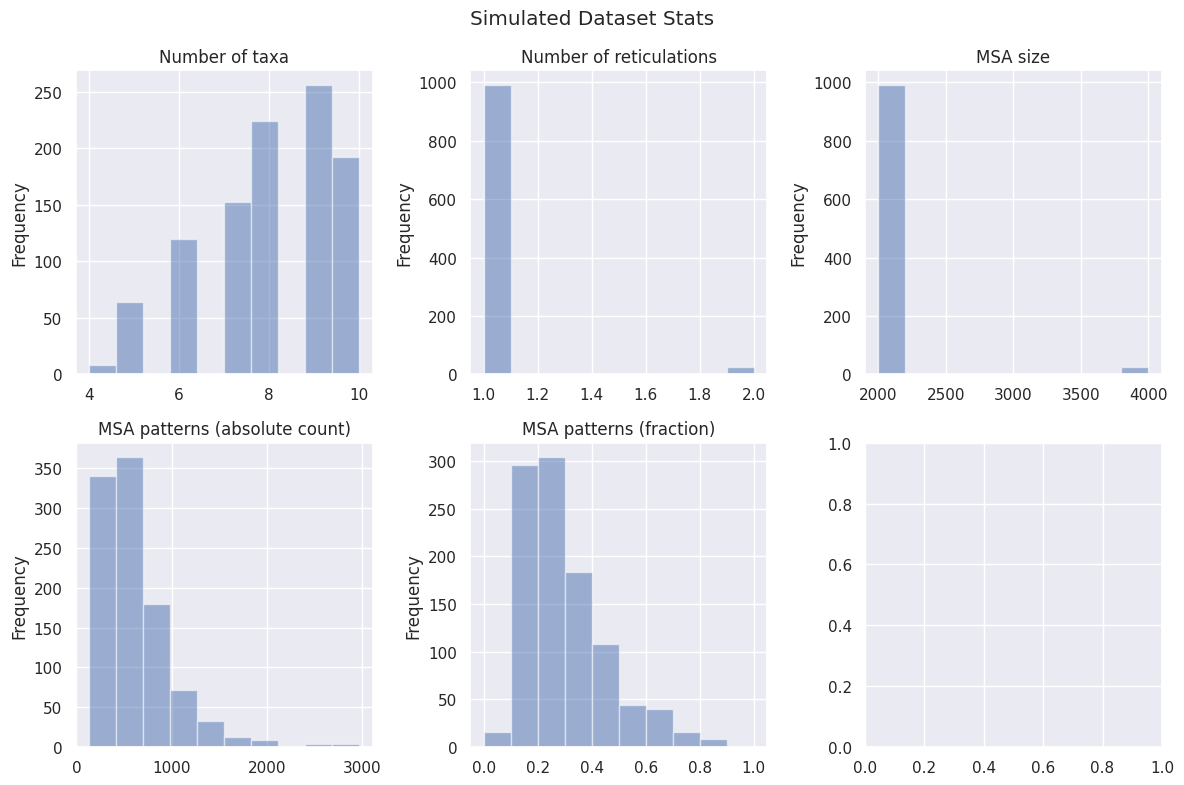

<Figure size 1200x800 with 0 Axes>

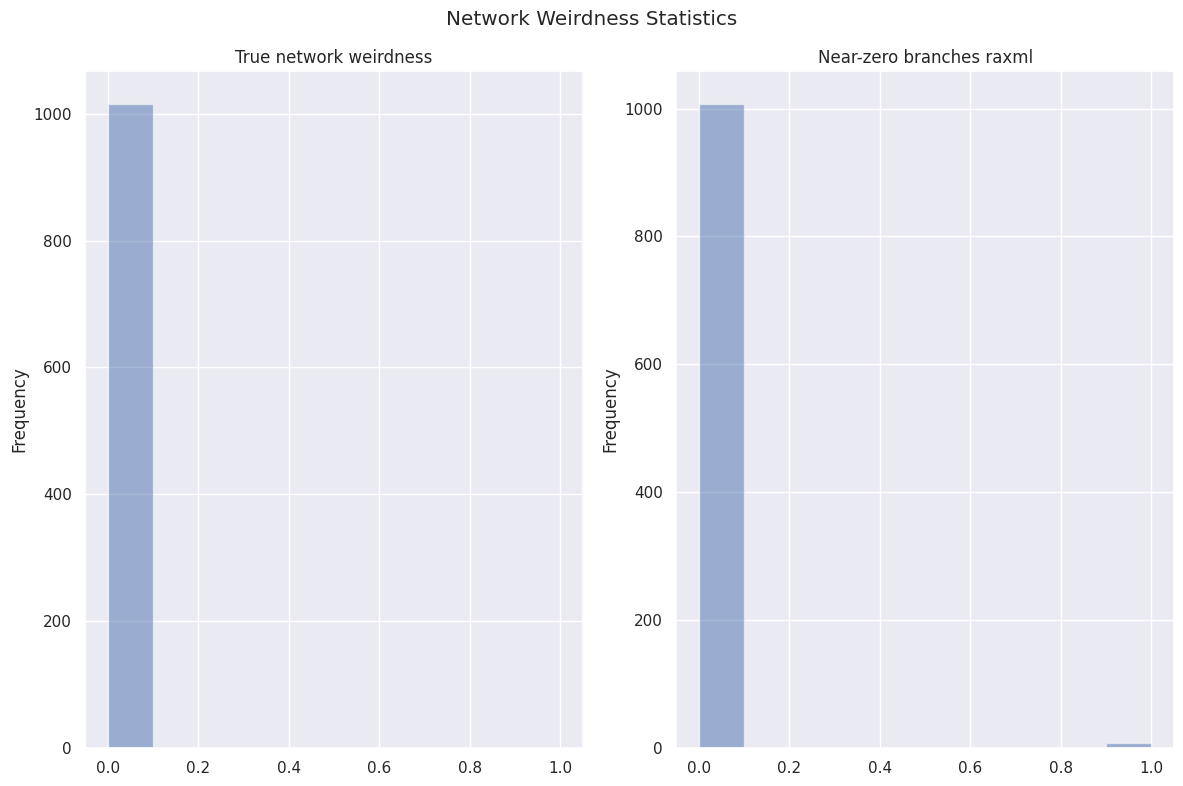

<Figure size 1200x800 with 0 Axes>

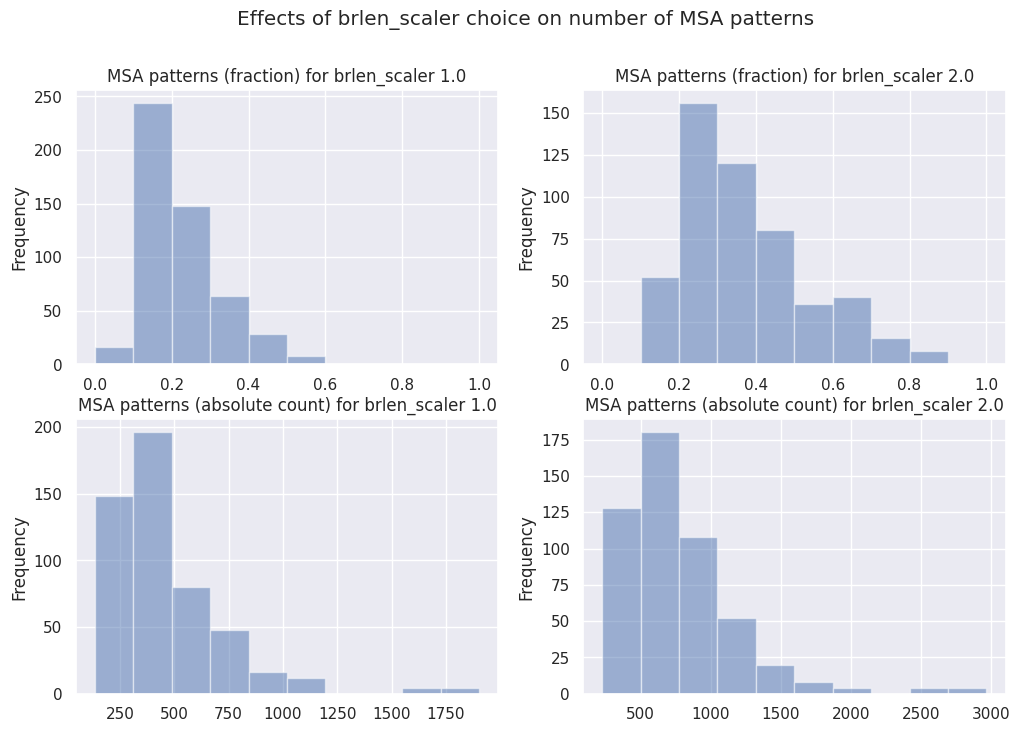

In [5]:
show_stats(df)

# Simulated dataset statistics after removing all "weird" networks and filtering out too tiny MSAs

Total number of datasets: 704


<Figure size 1200x800 with 0 Axes>

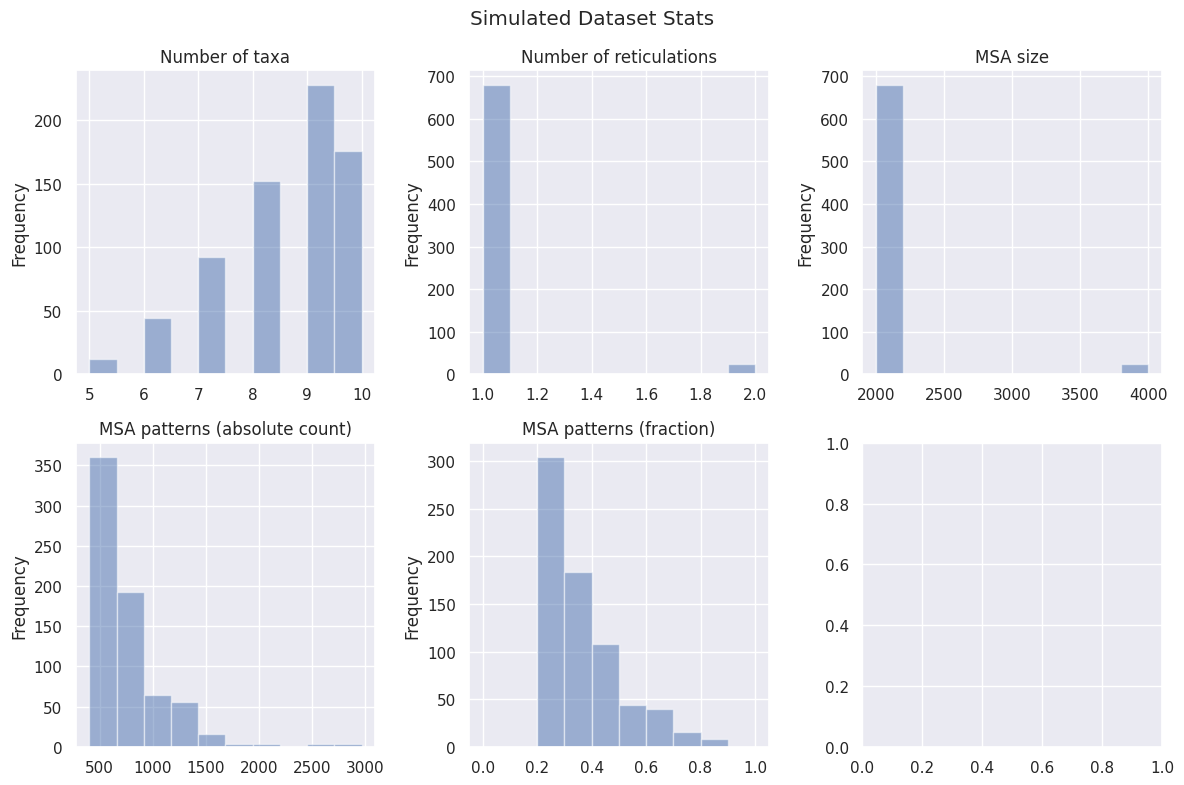

<Figure size 1200x800 with 0 Axes>

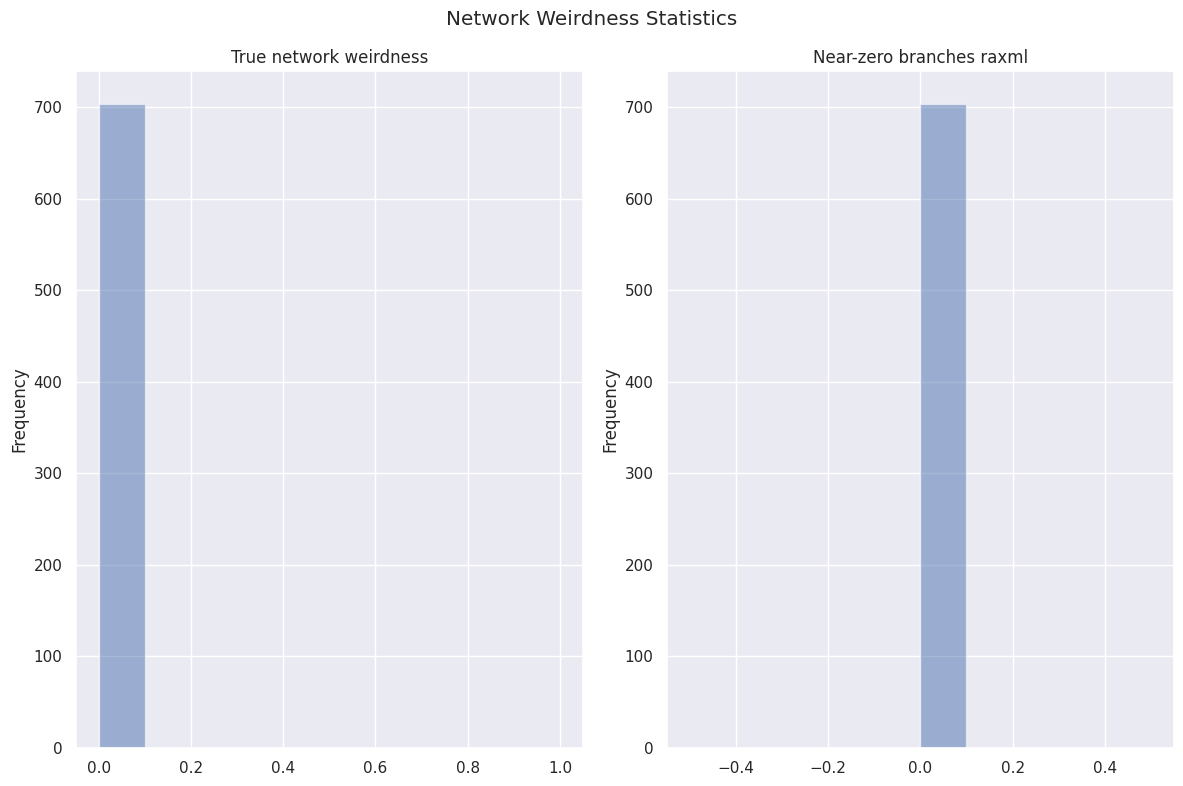

<Figure size 1200x800 with 0 Axes>

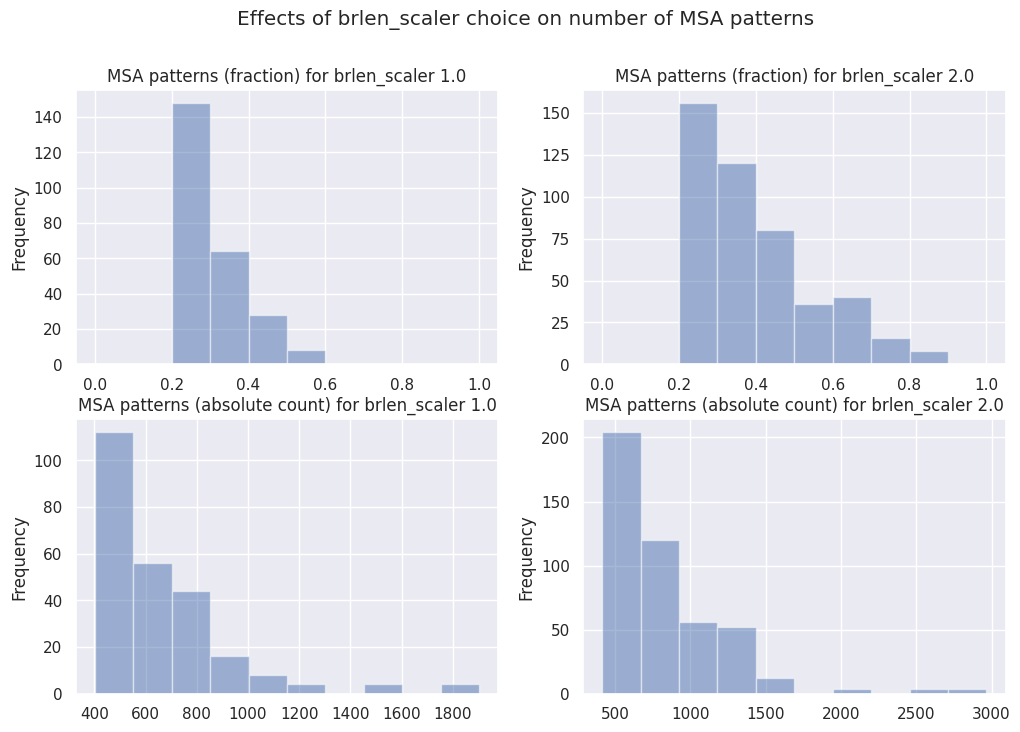

In [6]:
df_nonweird = df.query('(true_network_weirdness == 0.0) & msa_patterns >= 400')
show_stats(df_nonweird)

# Evaluation starting from raxml-ng best tree

+--------------------------------+------------------------+---------------------+---------------+
|                                | LikelihoodType.AVERAGE | LikelihoodType.BEST |    Overall    |
+--------------------------------+------------------------+---------------------+---------------+
|  Inferred BIC better or equal  |      89 (50.57 %)      |     94 (53.41 %)    | 183 (51.99 %) |
|       Inferred BIC worse       |      87 (49.43 %)      |     82 (46.59 %)    | 169 (48.01 %) |
| Inferred logl better or equal  |      76 (43.18 %)      |     83 (47.16 %)    | 159 (45.17 %) |
|      Inferred logl worse       |     100 (56.82 %)      |     93 (52.84 %)    | 193 (54.83 %) |
| Inferred n_reticulations less  |      55 (31.25 %)      |     56 (31.82 %)    | 111 (31.53 %) |
| Inferred n_reticulations equal |     114 (64.77 %)      |    116 (65.91 %)    | 230 (65.34 %) |
| Inferred n_reticulations more  |       7 (3.98 %)       |      4 (2.27 %)     |  11 (3.12 %)  |
+-------------------

<Figure size 1200x800 with 0 Axes>

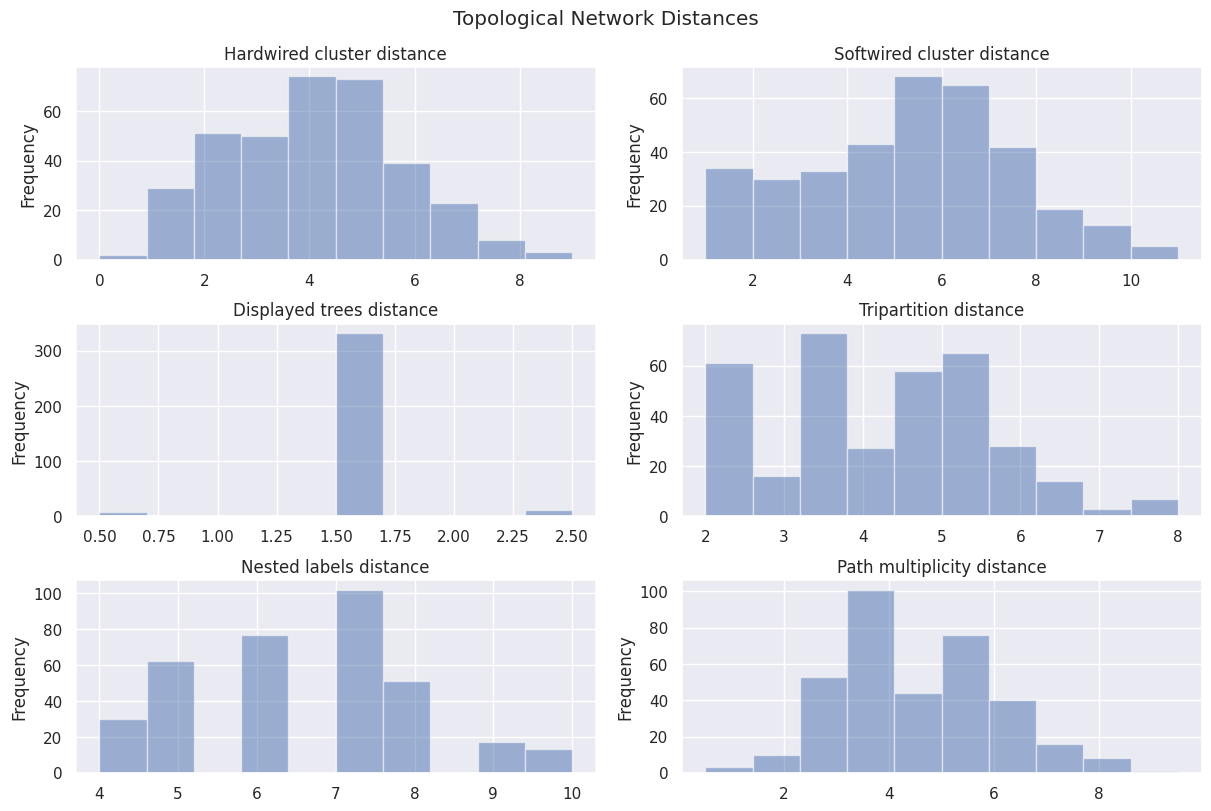

TODO: plot percentage of better-or-equal inferred BIC by number of MSA patterns


In [7]:
df_nonweird_start_from_raxml = df_nonweird.query('start_type == "FROM_RAXML"')
if len(df_nonweird_start_from_raxml) > 0:
    show_plots(df_nonweird_start_from_raxml)
else:
    print("No data found for StartType.FROM_RAXML")

# Evaluation starting from 5 random + 5 parsimony trees

+--------------------------------+------------------------+---------------------+---------------+
|                                | LikelihoodType.AVERAGE | LikelihoodType.BEST |    Overall    |
+--------------------------------+------------------------+---------------------+---------------+
|  Inferred BIC better or equal  |     150 (85.23 %)      |    152 (86.36 %)    | 302 (85.80 %) |
|       Inferred BIC worse       |      26 (14.77 %)      |     24 (13.64 %)    |  50 (14.20 %) |
| Inferred logl better or equal  |     137 (77.84 %)      |    138 (78.41 %)    | 275 (78.12 %) |
|      Inferred logl worse       |      39 (22.16 %)      |     38 (21.59 %)    |  77 (21.88 %) |
| Inferred n_reticulations less  |      21 (11.93 %)      |     21 (11.93 %)    |  42 (11.93 %) |
| Inferred n_reticulations equal |     154 (87.50 %)      |    155 (88.07 %)    | 309 (87.78 %) |
| Inferred n_reticulations more  |       1 (0.57 %)       |      0 (0.00 %)     |   1 (0.28 %)  |
+-------------------

<Figure size 1200x800 with 0 Axes>

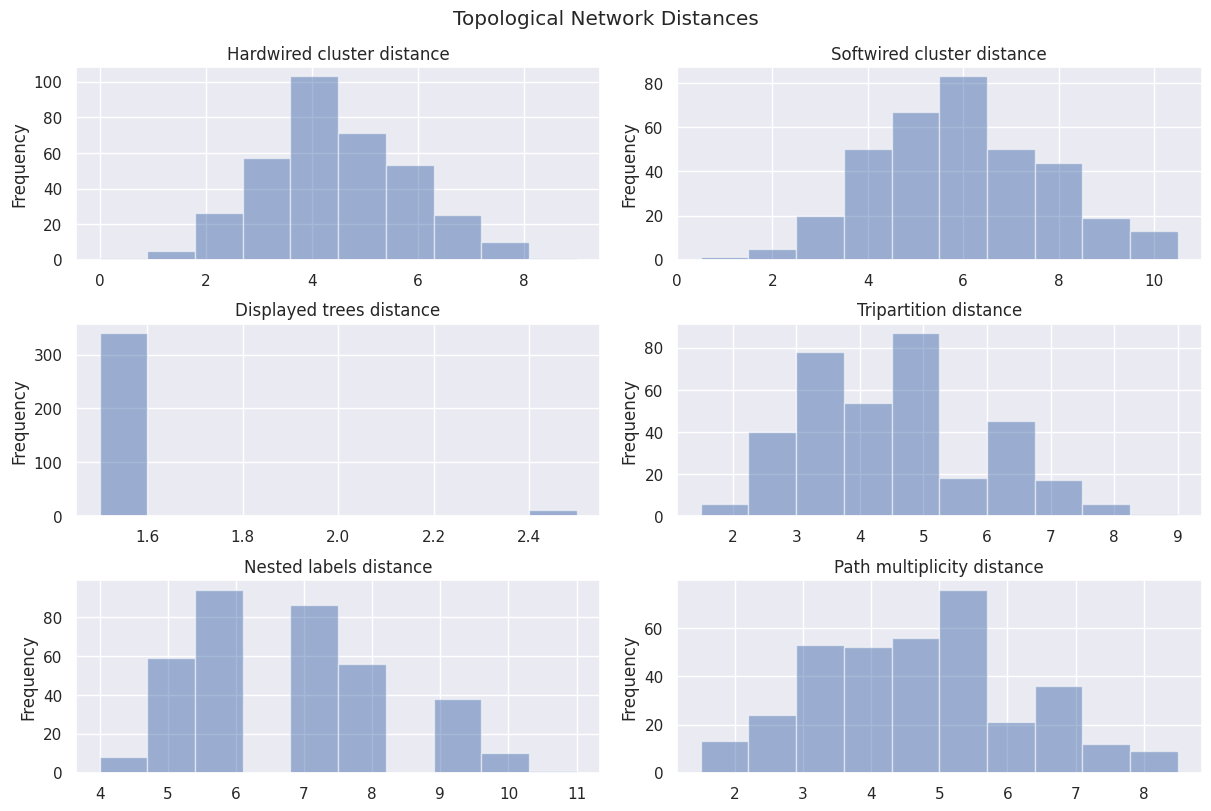

TODO: plot percentage of better-or-equal inferred BIC by number of MSA patterns


In [8]:
df_nonweird_random = df_nonweird.query('start_type == "RANDOM"')

if len(df_nonweird_random) > 0:
    show_plots(df_nonweird_random)
else:
    print("No data found for StartType.RANDOM")